# Auntoencoder
### It is basically used for dimensionality reduction, data compression, feature learning and so on 

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import torch.utils.data
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.Resize((128,128)),
                                transforms.ToTensor()
                                ])

data = datasets.ImageFolder(root="D:\\data\\archive\\train", transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=data, batch_size=8, shuffle=True)

In [3]:
data_iter = iter(data_loader)
images, labels = next(data_iter)
print(images.shape)
print(labels.shape)
print(torch.min(images), torch.max(images))

torch.Size([8, 3, 128, 128])
torch.Size([8])
tensor(0.) tensor(1.)


In [13]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(128*128, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 128*128),
            nn.Sigmoid() #for [-1, 1] tanh will be applied
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [14]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [15]:
epochs = 10
outputs = []
for epoch in range(epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 128*128)
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.0410
Epoch: 2, Loss: 0.0371
Epoch: 3, Loss: 0.0274
Epoch: 4, Loss: 0.0390
Epoch: 5, Loss: 0.0548
Epoch: 6, Loss: 0.0315
Epoch: 7, Loss: 0.0416
Epoch: 8, Loss: 0.0370
Epoch: 9, Loss: 0.0358
Epoch: 10, Loss: 0.0381


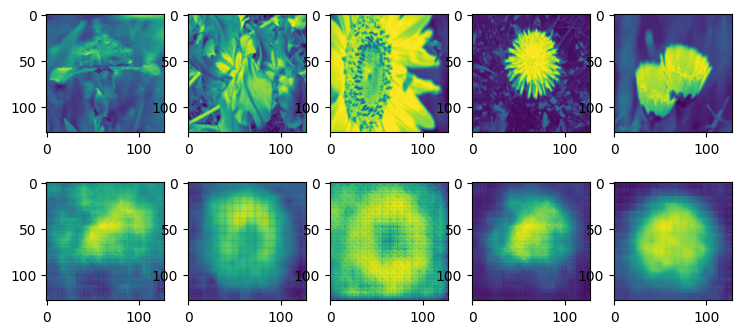

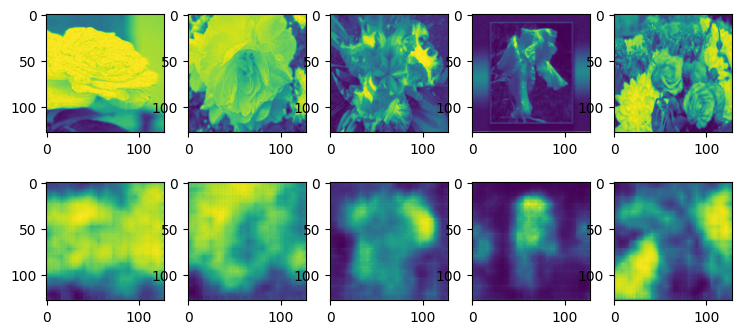

In [22]:
for k in range(0, epochs, 5):
    plt.figure(figsize=(18, 4))
    #plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 10: break
        plt.subplot(2, 10, i + 1)
        item = item.reshape(-1, 128,128)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 10: break
        plt.subplot(2, 10, 10+i + 1) #row length + i + 1
        item = item.reshape(-1, 128,128)
        plt.imshow(item[0])

### CNN approach

In [17]:
class AutoEncoder(nn.Module):
    def __init__(self):
        # N, 3, 128, 128
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3,stride=2,padding=1), # N, 16, 64, 64
            nn.ReLU(),
            nn.Conv2d(16,32,kernel_size=3,stride=2,padding=1), # N, 32, 32, 32
            nn.ReLU(),
            nn.Conv2d(32, 64,kernel_size=3, stride=2, padding=1), #N, 64, 16, 16
            nn.ReLU(),
            nn.Conv2d(64, 128, 16) # N,128, 1, 1
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 16),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [18]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [19]:
epochs = 10
outputs = []
for epoch in range(epochs):
    for (img, _) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.0437
Epoch: 2, Loss: 0.0298
Epoch: 3, Loss: 0.0335
Epoch: 4, Loss: 0.0263
Epoch: 5, Loss: 0.0313
Epoch: 6, Loss: 0.0286
Epoch: 7, Loss: 0.0254
Epoch: 8, Loss: 0.0252
Epoch: 9, Loss: 0.0165
Epoch: 10, Loss: 0.0155


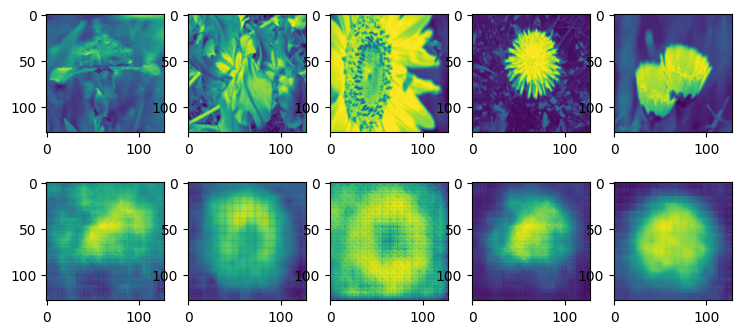

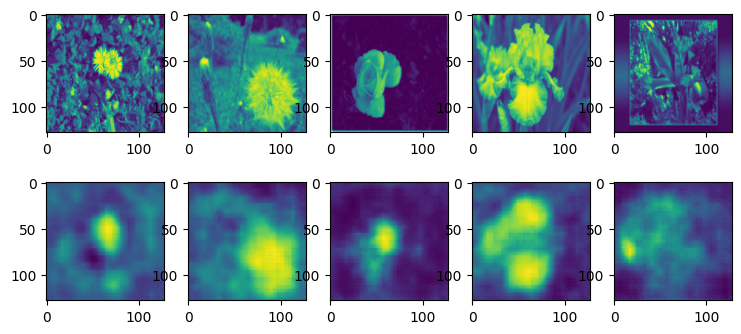

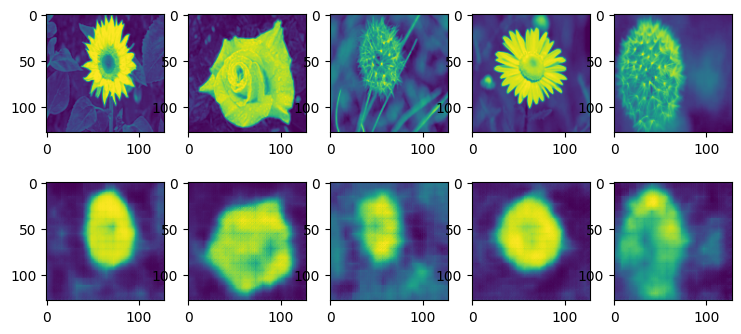

In [23]:
for k in range(0, epochs, 4):
    plt.figure(figsize=(18, 4))
    #plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 10, i + 1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 10, 10+i + 1) #row length + i + 1
        plt.imshow(item[0])

with less parameters CNN gives better results